# Project 2: Photon-matter interaction — Monte Carlo simulation of X-ray imaging

**TMA4320 Introduksjon til Vitenskapelige Beregninger**

Radiation is an important part of medical imaging, and X-rays are often used. However, the radiation involves health risk, and thus it is important to minimize the energy while still getting good enough images. During this project we will use Monte Carlo methods to simulate photon attenuation in matter. These simulations will be applied to our study of X-ray imaging and the necessary conditions to achieve good contrast while considering the absorbed dose. In addition, we use 3D arrays of attenuation coefficients to image and identify unknown objects. 

To achieve a good image we need good contrast between the different objects, and at the same time we need the intensity of the beam at the detector to be sufficient to get a good signal. 

Throughout the project we will assume one-dimensional photon propagation to simplify the problem. This means that the photons only travels in 1D-lines through the objects. This is for simplicity, but at the same time it will still give us useful results. However, this is not a perfect model of how it would be in reality. The photons would possibly be scattered and even though they change energy and direction, they may still hit the detector at another point and thus contribute to the intensity at the detector. This is neglected in our 1D-model. The photons in our model are either attenuated, or not, and both total absorption and scattering is seen as attenuation in our model.

Importing libraries:

In [1]:
# Numpy to make life easy
import numpy as np

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Increase default font size
plt.rcParams.update({'font.size': 14})

# Import for progress meter
from tqdm import tqdm, trange

## Problem 1

In the first problem we will simulate the attenuation of photons by using Monte Carlo methods. These methods use random number generation to simulate the propagation of each photon, for a large number of photons. After infinite simulations, the number of photons attenuated compared with the total photons will reflect the probability of a photon being attenuated in the material.

Here we assume that the propagation of the photon is one-dimensional, as discussed earlier. We simulate this propagation by dividing the trajectory into discrete steps of step size $\Delta x$. At each step, we will use a random number to determine if the photon is attenuated based on the attenuation coefficient $\mu$ and the step size. The probability of attenuation for each step is given as $p=\mu \Delta x$. We set the material thickness, $t$, to $10$cm and $\mu$ to $0.1$cm$^{-1}$. 

We started by defining constants and intervals. We then made a function, $f$, to calculate the analytical value of the intensity, given as $I(x)=I_0e^{-\mu x}$. We then made a function, $pho$, to calculate the attenuation of the photons using Monte Carlo methods. Here we used the probability, $p$, and a random number $z$ to determine if the photon is attenuated or not at each point. $pho$ will also return the analytical value by calling $f$ at point $x$ with $N_0$ photons. The reason we made $pho$ a function and not just a part of the code was because we wanted to test it multiple times for different number of photons, and instead of implementing the code at each point with different number of photons it is easier and cleaner to define one function to solve this given a number of photons.

Below we test the attenuation of a single photon through the material. The figure *Propagation of a Photon* illustrates the propagation of a photon and whether the photon is attenuated or not. We plotted four different graphs to illustrate that the numerical simulation of the photon's propagation is random. We can see that the photon does not always reach the end of the material, but it sometimes does. Based on the intensity curves in figure $2$ in the preperation material, we would expect that approximately $4$ out of $10$ photons will reach the end of the material, indicating a probablity of $0.4$, given $\mu = 0.1$. 

The analytical model will remain the same in each graph, and is calculated from the equation $I(x)=I_0e^{-\mu x}$. 

From the figure, we see that sometimes the number of photons are constant equal to $1$ throughout the material, which means that the photon propagates all the way through the material, and thus it is not attenuated. When the number of photons drops to $0$, the photon is attenuated before it reaches the end of the material. According to the figure, we can see that the numerical model is randomly varying for single photons, but for a higher number of photons we can expect a pattern similar to the analytical model and the propagation probability.

In [19]:
mu = 0.1                           # cm^-1, attenuation coefficient
dx = 0.1                           # cm, length of each step
p = mu*dx                          # Chance of attenuation per step 
t = 10                             # cm, total length
N_step = int(t/dx)                 # Intervals
x = np.linspace(0,t,N_step+1)      # Creates the x-axis, with N_step + 1 points
N = 1000                           # Amount of photons in the beam

def f(x,N0):  
    return N0*np.exp(-mu*x)        # Analytical solution of intensity

def pho(N0):                       # Photons (out of N0 photons from source) going through
    y = np.ones(N_step+1)          # Creates a basis for the numerical y-axis
    y2 = y.copy()                  # Creates a basis for the analytical y-axis
    N = N0
    y[0] = N0
    y2[0] = N0
    for i in range(1,N_step+1):
        for j in range(N):         # Goes through all remaining photons and checks if they are attenuated
            z = np.random.rand()
            if (z < p):
                N -= 1
        y[i] = N                   # Saves numerical value
        y2[i] = f(x[i],N0)         # Saves analytical value
    return y,y2

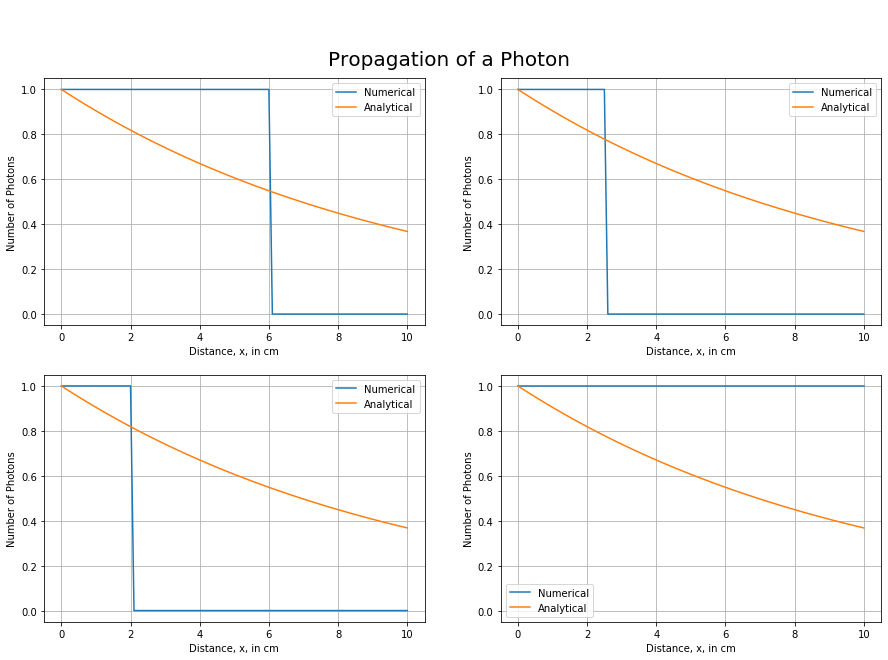

In [3]:
# Plotting 4 subplots with 1 photon to show variance in propagation
fig,ax = plt.subplots(2,2,figsize=[15,10])
fig.suptitle("\n\nPropagation of a Photon",fontsize=20)

for i in range(2):
    for j in range(2):
        y_1,y2_1 = pho(1)
        ax[i,j].plot(x,y_1,label="Numerical")
        ax[i,j].plot(x,y2_1,label="Analytical")    # Shows theoretical average
        ax[i,j].set_ylim([-0.05,1.05])
        ax[i,j].grid()
        ax[i,j].legend()
for axs in ax.flat:
    axs.set(xlabel='Distance, x, in cm', ylabel='Number of Photons')
plt.show()

When choosing the step size it is necessary to consider the probability. The probability must have values between $0$ and $1$. If $\mu$ is large, we have to compensate with a smaller $\Delta x$ such that the probability have possible and reasonable values. For large values of $\mu$ the photons would attenuate quickly, as we see from the equation for the probability $p$. And for large enough values of $\mu$, like $\mu=100$, the probability of attenuation could even end up with $p>1$. Then we will not get any photons through the material. To compensate for this we need smaller $\Delta x$, which means that we need smaller steps between each measure. Then we may again get a probability between $0$ and $1$, as we should have. Therefore, it is important choosing a step size that together with the attenuation coefficient gives us a reasonable probability for attenuation.

Here we would like to study the attenuation for different number of photons, and find which amount of photons that gives results close to the analytical value. When we increase the number of photons, we can expect that the numerical graph of propagation will approach the analytical model, as the sample size increases. Thus, a large number of photons will be the best for getting a good value. However, a large enough number of photons will make the code very slow, so we need to find a small enough $N$ that still gives results close to the analytical value. 

In this part of the problem we will simulate the propagation of $N$ photons inside the material by using the function $pho$, that we made to calculate for a given $N$. To get a better overview of the situation we will record the number of photons still present in the material for each discrete step, and plot the graph. 

The results are shown in the figure *Number of Photons as a Function of Distance*. We compare the numerical model to the analytical model, which accurately demonstrates the probability of photon attenuation. By varying the number of photons, we discovered that there only was a slight difference for large $N$, especially if $N > 1000$. We tested for different values of $N$, and noticed that the difference between $N=1000$ and $N=2000$ is very tiny, while $N=100$ can give results a little further from the analytical value. We thus concluded that $N=1000$ offers a good approximation to the analytical model. By increasing $N$, we will approach the analytical model further, but simultaneously the run time of the code will increase. Therefore it is appropriate to settle for a lower number of photons as long as this number serves as a good approximation, which we believe that $N=1000$ does. However, for large simulations that don't require as high precision, lower $N$s can be tolerated.

In the plot we decided to only plot for $N=1000$ and $N=100$ besides the analytical, as this gives a cleaner plot than if we included other values for $N$, especially for big $N$ as these would be approximately the same. We decided to include $N=1000$ as this was our preferred value for $N$, and $N=100$ as it shows that the model does not give good results for values that low. As we can see, $N=100$ (green in the plot) has a rather big error, while $N=1000$ (blue) follows the analytical (orange) very close, and thus have a small error.

Studing the plot, we can conclude that the results are as expected. The Monte Carlo methods randomly generates whether a photon is attenuated or not. When we consider only a few photons, the results will not necessarily correspond to the actual probability, as the Monte Carlo methods use random numbers, but with a large amount of photons, the results will closely resemble the probability from the analytically calculated results. Therefore, by increasing the number of photons we will achieve a better approximation of the analytical model. 

The analytical model indicates that a little fewer than $400$ out of $1000$ photons are not attenuated, an approximate probability of $0.4$. The exact probability is about $0.368$. This is generated from the last element of the list representing the values of the analytical model, y2_1000, expressing that about $368$ photons are absorbed out of the total $1000$ photons. 

Out of the N0=1000 photons there will on average be approximately 368 photons that propagates all the way through.


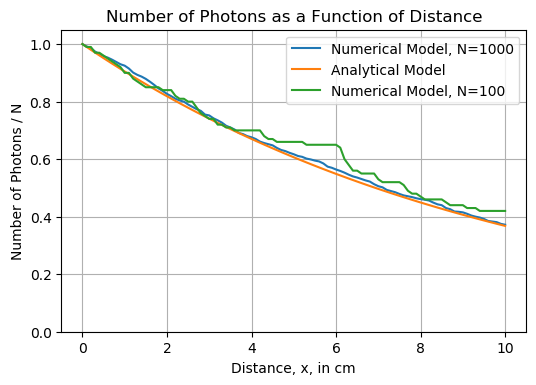

In [20]:
# Plotting the propagation of N0 = 1000 photons
y_1000,y2_1000 = pho(N)
newy,newy2 = pho(int(N/10))

print(f"Out of the N0={N} photons there will on average be approximately {y2_1000[-1]:.0f} photons that propagates all the way through.")

plt.figure(dpi=100)
plt.title('Number of Photons as a Function of Distance')
plt.plot(x,y_1000/(N),label="Numerical Model, N=1000")
plt.plot(x,y2_1000/N,label="Analytical Model")
plt.plot(x,newy/int(N/10),label="Numerical Model, N=100")
plt.xlabel('Distance, x, in cm')
plt.ylabel('Number of Photons / N')
plt.ylim([0,1.05])
plt.legend()
plt.grid()
plt.show()

# Problem 2

In problem 2, we will be simulating the attenuation of the photons. The goal is to study the conditions that gives us the best results for contrast and dose, and thus will give us the best images. Our system is a small object (bone) inside another object (tissue). We use two beams in this problem, where one goes through the bone and the tissue, while the other only goes through the tissue. In the calculation, the total thickness of the tissue is $3$cm, and the thickness of the bone is $1$cm. 

In the box below, we use the given files to access results on energy and the mass-attenuation coefficient $\frac{\mu}{\rho}$. However, we are interested in the attenuation coefficient $\mu$, and to get that we use $\rho_{tissue} = 1.02$ g/cm$^{3}$ and $\rho_{bone} = 1.92$ g/cm$^3$.

In [5]:
# Opening text files to use
tissueFile = open("tissue.txt")
boneFile = open("bone.txt")

rho_tissue = 1.02       # g/cm^3, tissue density
rho_bone = 1.92         # g/cm^3, bone density

# Collecting data from text files
tissueData = [[],[]]    # This format makes it easy to insert and access the data
for line in tissueFile:
    l1,l2 = line.split(", ")
    tissueData[0].append(float(l1)*1000)            # Energy in keV
    tissueData[1].append(float(l2)*rho_tissue)      # mu

boneData = [[],[]]
for line in boneFile:
    l1,l2 = line.split(", ")
    boneData[0].append(float(l1)*1000)              # Energy in keV
    boneData[1].append(float(l2)*rho_bone)          # mu

tissueFile.close()
boneFile.close()

Here, we will be plotting the attenuation coefficients for different energy levels. The results used here were found in the files, and accessed above. As the values change rapidly, we choose to plot with logarithmic scales on both axes as in this case this better shows how the attenuation coeffecients change as a function of energy. The figure *Attenuation Coefficients as a Function of Energy* shows the results.

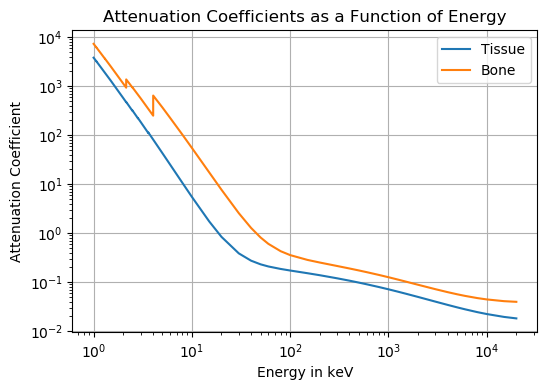

In [6]:
# Plotting the attenuation coeffecients as a function of the energy
plt.figure(dpi=100)
plt.title('Attenuation Coefficients as a Function of Energy')
plt.plot(tissueData[0],tissueData[1],label="Tissue")
plt.plot(boneData[0],boneData[1],label="Bone")
plt.xlabel('Energy in keV')
plt.ylabel('Attenuation Coefficient')
plt.legend()
plt.xscale("log")      # logarithmic scale is best in this case
plt.yscale("log")      # as it shows more of the development
plt.grid()
plt.show()

The intensity is given as $I=N\cdot E$, and to calculate the intensity at the detector we need to calculate the amount of photons propagating all the way through the material to the detector. We find this by using a random generator to decide if the photons attenuate at the different points in the material. 

As we can see from the figure *Intensity at Detector as a Function of Energy* the intensity at the detector will be larger for the beam going through only tissue than the beam going through tissue and bone. This makes sense, given that the bone has a higher attenuation coefficient, as seen from *Attenuation Coefficients as a Function of Energy*, and thus there will be fewer photons propagating all the way through. As we can see, the intensity for the smaller energy levels is approximately equal to $0$. This means that for those energy levels, approximately zero photons will propagate completely through the material and hit the detector. 

For this simulation, it is necessary to change the code in problem 1 such that $\mu$ depends on the distance. In problem 1, we developed a code where $\mu$ has the same value for every step. In this problem, we represent $\mu$ as a list of values, with one for each step, instead of using one constant value.

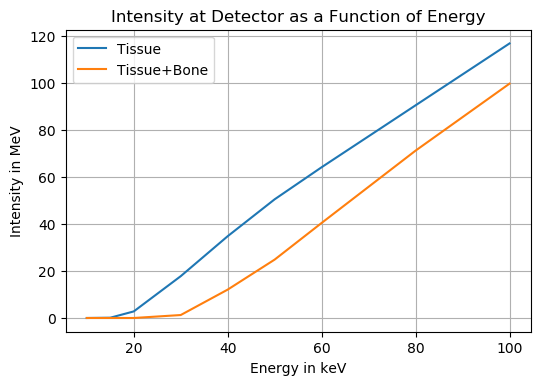

In [7]:
t_2 = 3                     # cm
dx = 0.1                    # cm
N_step = (int(t_2/dx)//3)*3 # Intervals, needs to be divisible by 3
N0 = 2000                   # Gives good results, and doesn't take very long
E = []                      # Energies between 10keV and 100keV
I1 = []                     # Intensities for the beam going through only tissue
I2 = []                     # Intensities for the beam going through tissue and bone
C = []                      # Contrasts between I1 and I2

# Creating the mu (attenuation coefficient) for tissue and tissue + bone for each step
def mu_1(N_step,e):                        # e is an index that shows which energy-coefficient pair one has
    return [tissueData[1][21+e]]*N_step
def mu_2(N_step,e):
    return [tissueData[1][21+e]]*(N_step//3) + [boneData[1][21+e]]*(N_step//3) + [tissueData[1][21+e]]*(N_step//3)


# Calculating the intensities and the contrast for each energy
for e in range(0,9):
    N1 = N0
    N2 = N0
    mu1 = mu_1(N_step,e)
    mu2 = mu_2(N_step,e)
    for i in range(1,N_step+1):
        p1 = dx*mu1[i-1]
        p2 = dx*mu2[i-1]
        for j in range(N1):
            z = np.random.rand()
            if (z < p1):
                N1 -= 1
        for j in range(N2):
            z = np.random.rand()
            if (z < p2):
                N2 -= 1
    E.append(tissueData[0][21+e])    # Corresponding energy
    I1.append(N1*E[-1]/1000)         # Intensity for tissue, N*E
    I2.append(N2*E[-1]/1000)         # Intensity for tissue+bone
    if(e>1):                         # For lower e, we may divide by 0, and the results have low accuracy
        C.append((N1-N2)/N1)         # Contrast, with N1 != 0

# Plotting the intensity at the detector as a function of energy
plt.figure(dpi=100)
plt.title('Intensity at Detector as a Function of Energy')
plt.plot(E,I1,label="Tissue")
plt.plot(E,I2,label="Tissue+Bone")
plt.xlabel('Energy in keV')
plt.ylabel('Intensity in MeV')
plt.legend()
plt.grid()
plt.show()

From the calculations above we also acquired results for the contrast, given as $C=\frac{I_1-I_2}{I_1}$. Here we have $I_1$ as the intensity for the beam through the tissue, and $I_2$ through tissue and bone. Here we don't calculate for the smallest energy levels, as $I_1$ would be approximately equal to $0$ here, and since $I_2 = 0$, the contrast would be constantly equal to $1$ for $I_1 \neq 1$. Therefore, we chose to plot the contrast for energy levels $20$keV to $100$keV.

From the formula we can see that by assuming $I_2 \leq I_1$ we get $0 \leq C \leq 1$. $C$ is at its maximum when $I_2=0$ and $I_1 \neq 0$. We can see from the figure *Contrast as a Function of Energy* that the contrast is best ($\approx1$) at energy equal to $20$keV. This fits well, as we can see from *Intensity at Detector as a Function of Energy* that the intensity from the beam through tissue and bone is approximately equal to zero, while this is not the case for the beam through only tissue. Physically this says that all photons going through the material will go through only the tissue, which will be good for imaging as the areas where no photons went through will be where the bone is, and here there will be no signal at the detector.

In general, we can conclude that lower energies give better contrast.

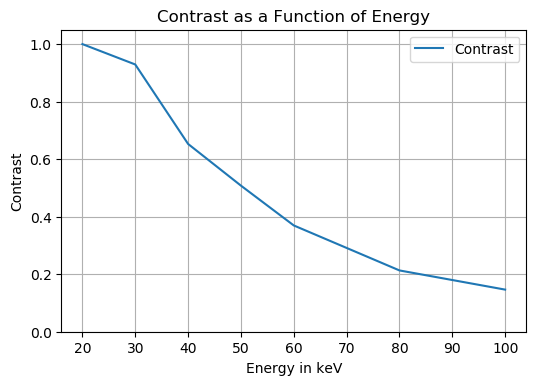

In [8]:
# Plotting the contrast as a function of energy
plt.figure(dpi=100)
plt.title('Contrast as a Function of Energy')
plt.plot(E[2:],C,label="Contrast")
plt.xlabel('Energy in keV')
plt.ylabel('Contrast')
plt.ylim([0,1.05])
plt.legend()
plt.grid()
plt.show()

Now we assume that the detector needs an intensity of $10$MeV from the $I_1$ beam to detect a signal. We want to find the $N_0$ required for the intensity to be $10$ MeV at the detector for each energy $E$ in the interval $10$keV to $100$keV, however, as $10$keV was nearly impossible to reach, we only used energies from $15$keV to $100$keV. We start with $N=\frac{I}{E}$, as this is a natural starting point because it is the lowest possible value in this situation. Then we calculate the propagation of the photons. Here we could use the developed code in problem 1, but since we don't need the analytical value, it is better to redo it as inline code. In addition, this will reduce the run time, as function calls in python can take a lot of unnecessary time. Finally, we plot the number of photons to be emitted from the source for different energy levels in the figure *Number of Photons Emitted From Source as Function of Energy*. In addition, we plot the the resulting intensities for the two beams, for tissue, and tissue and bone in *Intensity as a Function of Distance for Different N0 and Energies*. 

*Number of Photons Emitted From Source as Function of Energy* indicates that more photons must be emitted from the source with a lower energy. As the energy increases, the amount of photons to be emitted decreases. This makes sense, as the attenuation constants decrease with increasing energy.

In *Intensity as a Function of Distance for Different N0 and Energies* for only the tissue, we can witness that the intensity decreases as the energy increases. This also occures for the figure for tissue and bones, but here the intensity generally decreases more rapidly. In addition, the intensity reaches zero at some distances for the highest values of $N_0$. This means that, for low energies, no photons will hit the material after going through both tissue and bone. In the figure with only the tissue, the intensities decreases toward the same value at the same final distance, which is a result of the number of photons being specifically set to have them reach a certain intensity at the detector. 

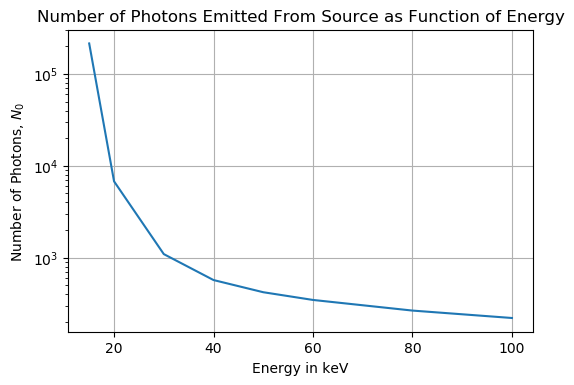

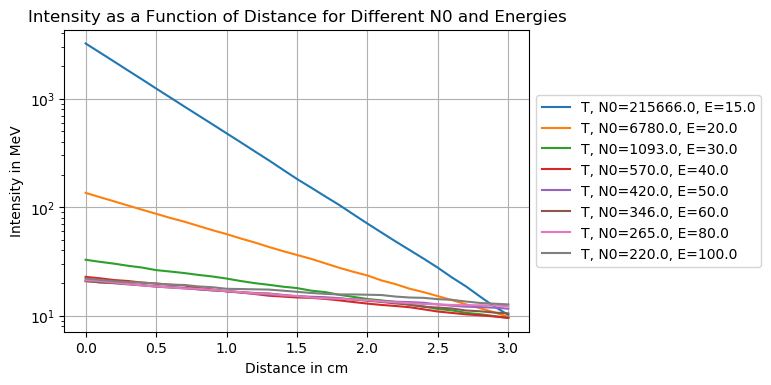

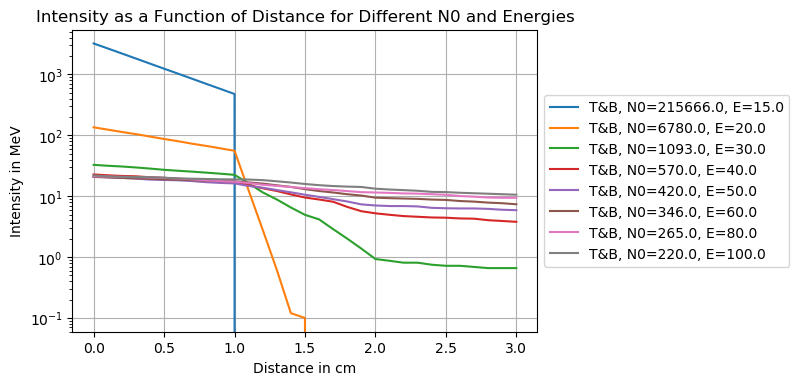

In [9]:
intensity = 10                      # MeV, desired intensity for the beam going through tissue
num_photons1 = np.zeros(len(E)-1)   # Number of photons needed to end up with 10MeV intensity at the detector
    
def num_photons(E,mu):              # Finding the N0 needed for the intensity to be 10MeV at the detector for different energy E
    N_0 = int(intensity*1000/E)     # Since it is the minimum possible value it is a natural starting point
    Nout = 0                        # Number of photons at the detector
    Nlim = int(intensity*1000/E)    # Desired amount of photons at detector
    while (Nout < Nlim):            # Goes until there is an instance of more photons at the detector than the desired amount
        Nout = N_0
        for k in range(1,N_step+1): # Simulating beam
            p = dx*mu[k-1]
            z = np.random.rand(Nout)
            for j in range(Nout):
                if (z[j] < p):
                    Nout -= 1
        if (E < 19):                # To reduce run time, large values have lower accuracy
            N_0 += 5000             # This also makes it less likely to systematically undershoot
        else:                       # If this is too low, chance will likely make Nout > Nlim earlier than expected,
            N_0 += 20               # giving a slightly low answer for N_0
        if (N_0 > 1E6):             # Break for too high values (which can happen for small energy levels)
            break
    return N_0

# Calculating propagation of photons
X = np.linspace(0,3,N_step+1)
I1_list = []  # Intensity simulation for each energy, tissue
I2_list = []  # Intensity simulation for each energy, tissue and bone
for i in range(1,len(E)):
    mu1 = mu_1(N_step,i)
    mu2 = mu_2(N_step,i)
    num_photons1[i-1] += num_photons(E[i],mu1) # Calculates desired amount of photons, and adds to an array
    N1 = int(num_photons1[i-1])
    N2 = N1
    n1 = np.zeros(N_step+1)    # Amount of photons for each point, tissue
    n1[0] = N1
    n2 = np.zeros(N_step+1)    # Amount of photons for each point, tissue and bone
    n2[0] = N1
    for k in range(1,N_step+1):
            p1 = dx*mu1[k-1]
            p2 = dx*mu2[k-1]
            z1 = np.random.rand(N1)
            z2 = np.random.rand(N2)
            for l1 in range(N1):
                if (z1[l1] < p1):
                    N1 -= 1
            n1[k] = N1
            for l2 in range(N2):
                if(z2[l2] < p2):
                    N2 -= 1
            n2[k] = N2
    I1_list.append(n1*E[i]/1000)  # Converts from amount of photons to intensity, and adds to I1_list
    I2_list.append(n2*E[i]/1000)  # Converts from amount of photons to intensity, and adds to I2_list
    
# Plotting the number of photons emitted from the source for different energy levels
plt.figure(dpi=100)
plt.title("Number of Photons Emitted From Source as Function of Energy")
plt.plot(E[1:],num_photons1)
plt.xlabel("Energy in keV")
plt.ylabel(f"Number of Photons, $N_0$")
plt.yscale("log")    # To better show the development
plt.grid()
plt.show()

# Plotting intesity for different energies and number of photons
plt.figure(dpi=100)
plt.title("Intensity as a Function of Distance for Different N0 and Energies")
for p in range(len(I1_list)):
    plt.plot(X,I1_list[p],label="T, N0={N0}, E={E}".format(N0=num_photons1[p],E=E[p+1]))
plt.xlabel("Distance in cm")
plt.ylabel("Intensity in MeV")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
plt.grid()
plt.show()

plt.figure(dpi=100)
plt.title("Intensity as a Function of Distance for Different N0 and Energies")
for p in range(len(I1_list)):
    plt.plot(X,I2_list[p],label="T&B, N0={N0}, E={E}".format(N0=num_photons1[p],E=E[p+1]))
plt.xlabel("Distance in cm")
plt.ylabel("Intensity in MeV")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale("log")
plt.grid()
plt.show()

By the equation $D=\frac{absorbed \space energy}{mass} = \frac{N_{att} E}{V\rho}$ we can calculate the total dose absorbed along the two beams $(D_1 + D_2)$. 

Then we plot the dose as a function of energy in the same coordinate system as we plot the contrast as a function of energy in *Dose and Contrast*. The plot illustrates that the dose decreases as the energy increases, similar to the contrast which also decreases, but less rapidly. 

*Dose and Contrast* indicates that the energy should be around $30$ keV to obtain both good contrast and a low dose. Then the contrast will be high enough to create a clear image, while the dose is not too high or harmful. Still, a higher energy can be used if a high contrast is not as important, as the dose is still somewhat high.

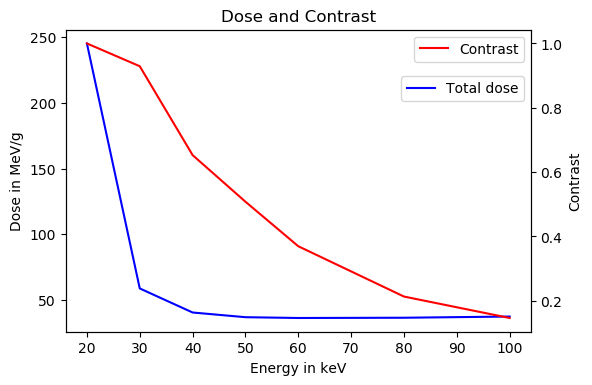

In [10]:
# Dose from formula
def D(photons,E,V,rho):
    return ((photons * E) / (V * rho))

# Calculating the total dose for each beam
dose1 = np.zeros(len(E)-1)
dose2 = dose1.copy()
for i in range(1,len(dose1)+1):
    dose1[i-1] += D(num_photons1[i-1]-I1_list[i-1][-1],E[i],1,rho_tissue)   # Volume is set to 1 cm^3
    dose2[i-1] += D(num_photons1[i-1]-I2_list[i-1][-1],E[i],1,rho_tissue)*2/3 + D(num_photons1[i-1]-I2_list[i-1][-1],E[i],1,rho_bone)/3

# Plotting the dose and contrast in the same plot, but with different y-axes
fig,ax = plt.subplots(dpi=100)
ax.plot(E[2:],(dose1[1:]+dose2[1:])/1000,label="Total dose",color="b")
ax.set_xlabel("Energy in keV")
ax.set_ylabel("Dose in MeV/g")
ax.legend(bbox_to_anchor=(1,0.87))  # To keep labels from overlapping
ax2 = ax.twinx()
ax2.plot(E[2:],C,label="Contrast",color="r")
ax2.set_ylabel("Contrast")
ax2.legend()
plt.title("Dose and Contrast")
plt.show()

# Problem 3

Now, we will try to image different objects by sending photons through them. The objects are three-dimensional, and have different attenuation coefficients throughout them. We will be testing with different energies to see which energy level give the best images for these objects.

Below we test with the given test array, and plot the image for different angles through the three-dimensional object. As we can see from the figures, numerical version does not give as clear of a picture as the figure provided in the project description. This is because the Monte Carlo methods are based on randomness, and there will always be some random variations leading to a less clear image.

First we create a function, $image2$, that will create an image for each direction by sending a given number of photons through it. We run through the code and use Monte Carlo method to decide at each point if the photon is attenuated or not. Then we plot the images.

The contour plots illustrate the intensity of the different energies when imaging in the three perpendicular directions. Here we have imaged two different objects with different energy values. 

The plots with the lowest energy value have higher contrasts than the plots with the lowest energy value. These results match *Dose and Contrast*.

We believe the first object is a pair of lungs. Here we only have a clear image in one of the directions, while in the other two directions we only have a thin stripe of the image. This is because the lungs have the size $13\times 128\times 128$. We will therefore get two images of the size $13\times 128$. For these images, it is hard to see what the object is supposed to be. However, from the first image we noticed that it looks like the object has two parts, and is shaped like a pair of lungs. In the image we see a part of a person in a CT-scan, where we are mainly looking at the lungs.

The second object looks similar to a coffee mug or a cup. Here we have three clear images from each direction, because the matrix has a size of $60\times 60\times 50$, and thus all images are of a dimension that makes it easy to see what's on the image.

In problem 2 we concluded that an energy of $30$ keV would probably be the best to make a clear image with a high contrast and at the same time a low energy value. In this case, based on only the quality of the images, we would use the lowest energies of $20$keV and $25$keV because this generates the highest contrast, and therefore the most clear image. However, the dose of these energy levels is quite high, as we can see from *Dose and Contrast*. Therefore, in real life we should settle for a little worse image to avoid the health risk coming from too high dose.

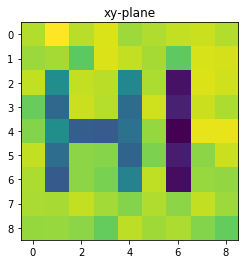

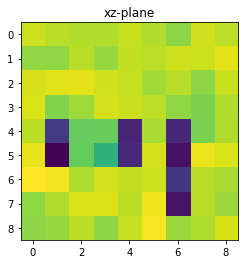

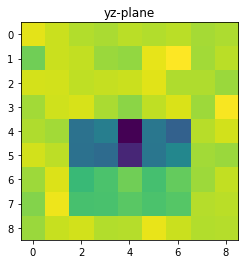

In [11]:
# Testing with the given test array
test = np.load("test_array.npy")

def image2(attenuation_array,energy,N0,ds):
    Nz = len(attenuation_array)
    Ny = len(attenuation_array[0])
    Nx = len(attenuation_array[0][0])
    xy_plane = np.ones((Ny,Nx))*N0              # For the beams propagating along the z-axis
    xz_plane = np.ones((Nz,Nx))*N0              # For the beams propagating along the y-axis
    yz_plane = np.ones((Nz,Ny))*N0              # For the beams propagating along the x-axis
    
    for z in range(Nz):
        for y in range(Ny):
            for x in range(Nx):                 # Looks at one point, and the beams going in each direction at that point
                p = ds*attenuation_array[z][y][x]
                Nyz = int(yz_plane[z][y])       # Number of photons left in the beam
                Ryz = np.random.rand(Nyz)
                for n in range(Nyz):
                    if(Ryz[n]<p):
                            yz_plane[z][y] -= 1
                Nxy = int(xy_plane[y][x])
                Rxy = np.random.rand(Nxy)
                for n in range(Nxy):
                    if(Rxy[n]<p):
                        xy_plane[y][x] -= 1
                Nxz = int(xz_plane[z][x])
                Rxz = np.random.rand(Nxz)
                for n in range(Nxz):
                    if(Rxz[n]<p):
                        xz_plane[z][x] -= 1
    
    plt.imshow(xy_plane*energy)                 # Plots as a contour plot
    plt.title("xy-plane")
    plt.show()
    plt.imshow(xz_plane*energy)
    plt.title("xz-plane")
    plt.show()
    plt.imshow(yz_plane*energy)
    plt.title("yz-plane")
    plt.show()

image2(test,40,1000,0.5/9)          # Simulates and plots the test array, the final argument is total length/steps

In [12]:
# Loading the necessary files
obj1_100 = np.load("object1_100keV.npy")
obj1_20 = np.load("object1_20keV.npy")
obj1_50 = np.load("object1_50keV.npy")
obj2_25 = np.load("object2_25keV.npy")
obj2_50 = np.load("object2_50keV.npy")
obj2_75 = np.load("object2_75keV.npy")

Object number 1, with energy = 100keV


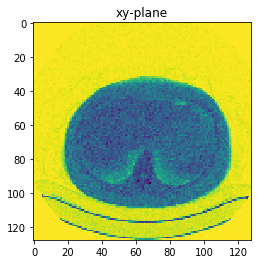

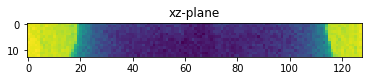

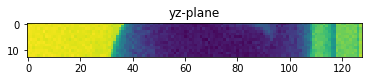

In [13]:
N_pho = 400

print("Object number 1, with energy = 100keV")

image2(obj1_100,100,N_pho,0.1)  # N_pho=400 gives good results without taking too long, chose 0.1 as step length

Object number 1, with energy = 50keV


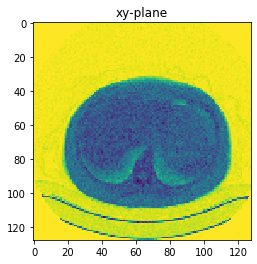

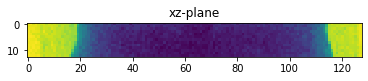

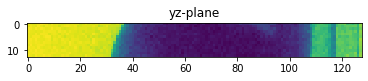

In [14]:
print("Object number 1, with energy = 50keV")

image2(obj1_50,50,N_pho,0.1)

Object number 1, with energy = 20keV


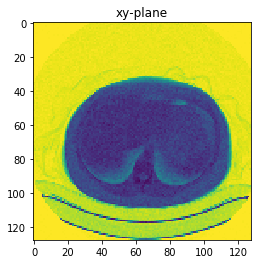

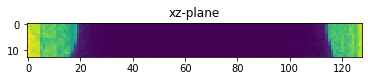

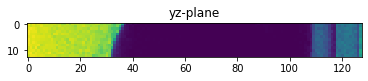

In [15]:
print("Object number 1, with energy = 20keV")

image2(obj1_20,20,N_pho,0.1)

Object number 2, with energy = 75keV


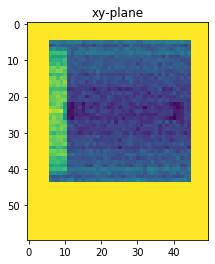

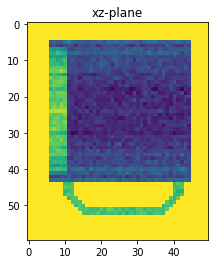

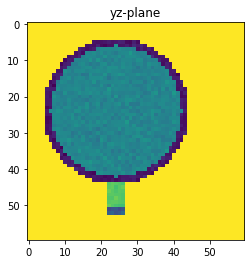

In [16]:
print("Object number 2, with energy = 75keV")

image2(obj2_75,75,N_pho,0.1)

Object number 2, with energy = 50keV


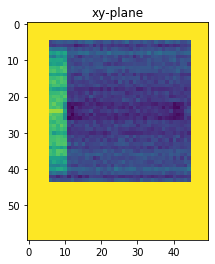

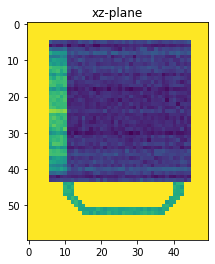

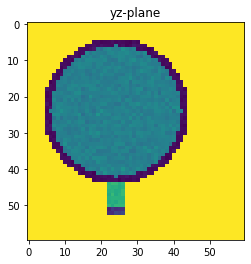

In [17]:
print("Object number 2, with energy = 50keV")

image2(obj2_50,50,N_pho,0.1)

Object number 2, with energy = 25keV


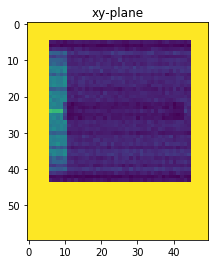

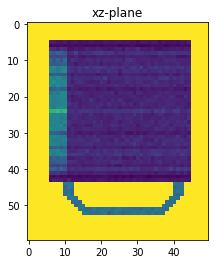

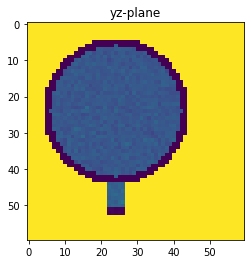

In [18]:
print("Object number 2, with energy = 25keV")

image2(obj2_25,25,N_pho,0.1)

**Summary:**

In this project we studied X-ray imaging and the necessary conditions to achieve good contrast while considering the absorbed dose. We simulated photon attenuation in matter by using Monte Carlo Methods. Thorughout the project we assumed one-dimensional propagation to simplify the problem, and therefore it was not an entirely accurate model of the reality. 

In problem 1 we studied the attenuation and propagation of photons. We calculated the attenuation probability to $0.37$. Thereby, we could conclude that the numerical model with $N=1000$ gives a good approximation to the analytical model. 

In problem 2 we simulated the attenuation of the photons and calculated the attenuation coefficients and the intensity of the two beams for different energy values. These results helped us study the correlation between dose and energy, and contrast and energy. In addition, we discovered that to obtain both good contrast and a low dose in an image, we needed an energy of about $30$keV.

Both problem 1 and problem 2 were relevant to solving problem 3, where we imaged a pair of lungs and a coffee mug by sending photons through the objects. By using different energy values, we could confirm the previous results that low energy values will induce high contrasts, and a clearer image. 

Even though the calculations point towards a low energy value, we still need to consider the health risks of such high intensities. Therefore we need to settle for a lower contrast and higher energy to prevent these risks, while we still can get usable images. 
